In this we will get the pre defined weights from the mat file and use them to forward propagate the neural network for the data handrecognisition

In [1]:
import numpy as np
from scipy import optimize as opt
from matplotlib import pyplot as plt
from scipy.io import loadmat

![title](neuralnetwork.png)

######  source Andrew Ng

In [2]:
input_layersize=400
hidden_layersize=25
num_labels=10

In [3]:
data=loadmat('ex3data1.mat')

In [4]:
X=data['X']
Y=data['y']


In [5]:

m,n=X.shape

In [6]:
def Displaydata(X,m):
    _,axarr=plt.subplots(10,10,figsize=(10,10))
    for i in range(10):
        for j in range(10):
            axarr[i,j].imshow(X[np.random.randint(m)].reshape(20,20,order='F'))
            axarr[i,j].axis('off')


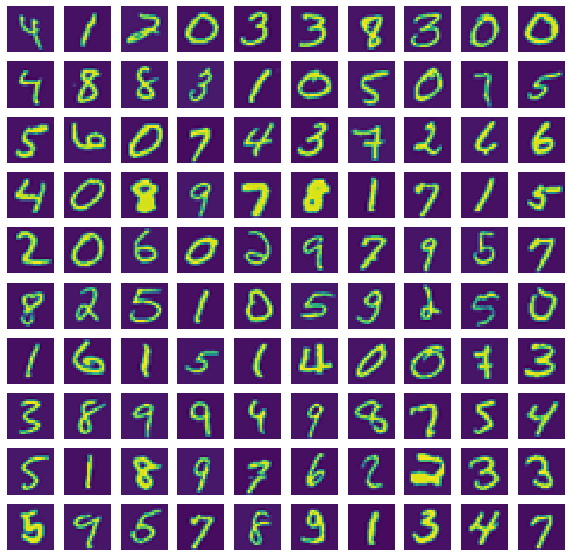

In [7]:
Displaydata(X,m)

In [8]:
param=loadmat('ex3weights.mat')

In [9]:
Theta1=param['Theta1']

In [10]:
Theta2=param['Theta2']

In [11]:
Theta1.shape

(25, 401)

In [12]:
Theta2.shape

(10, 26)

In [13]:
def sigmoid(z):
    temp=-z
    temp=np.exp(temp)
    temp=1+temp
    temp=1.0/temp
    return temp

In [14]:
def predicti(X,Theta1,Theta2):
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    predict=sigmoid(X@Theta1.T)
    predict=np.hstack((ones,predict))
    predict=sigmoid(predict@Theta2.T)
    return predict
    

In [15]:
predict = predicti(X,Theta1,Theta2)

In [16]:
predict.shape

(5000, 10)

In [17]:

predict=np.argmax(predict,axis=1)+1

In [18]:
predict.shape

(5000,)

In [19]:
np.mean(predict[:,np.newaxis]==Y)*100

97.52

neural network prediction is0
neural network prediction is[6]
neural network prediction is[8]
neural network prediction is[2]
neural network prediction is[4]
neural network prediction is[1]
neural network prediction is[8]
neural network prediction is[9]


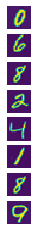

In [37]:
_,arr=plt.subplots(8)
for i,a in enumerate([2,3000,4000,1000,2000,800,4000,4999]):
    arr[i].imshow(X[a,:].reshape(20,20,order='F'))
    arr[i].axis('off')
    predict = predicti(X[a,:][:,np.newaxis].T,Theta1,Theta2)
    predict=np.argmax(predict,axis=1)+1
    predict=0 if predict==10 else predict
    print(f"neural network prediction is{predict}")

In [23]:
X[2,:][:,np.newaxis].shape

(400, 1)

In [31]:
arr.shape

(8,)